### Priprava podatkov za obdelavo

In [1]:
from Classes import Data

data = Data()

### Računanje št. nesreč letal skozi leta

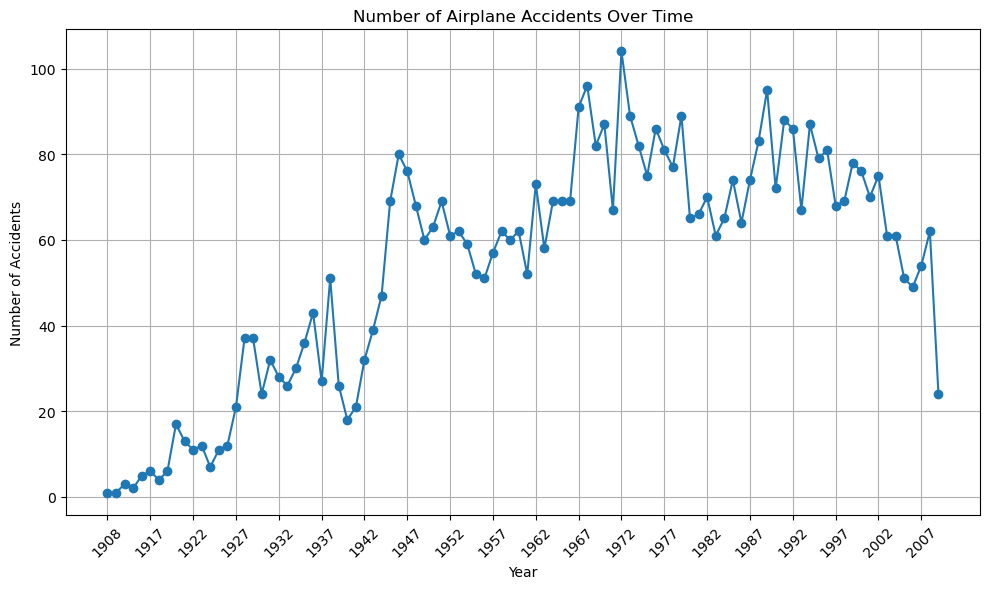

In [2]:
data.crashes_over_time() #mau niha pa to

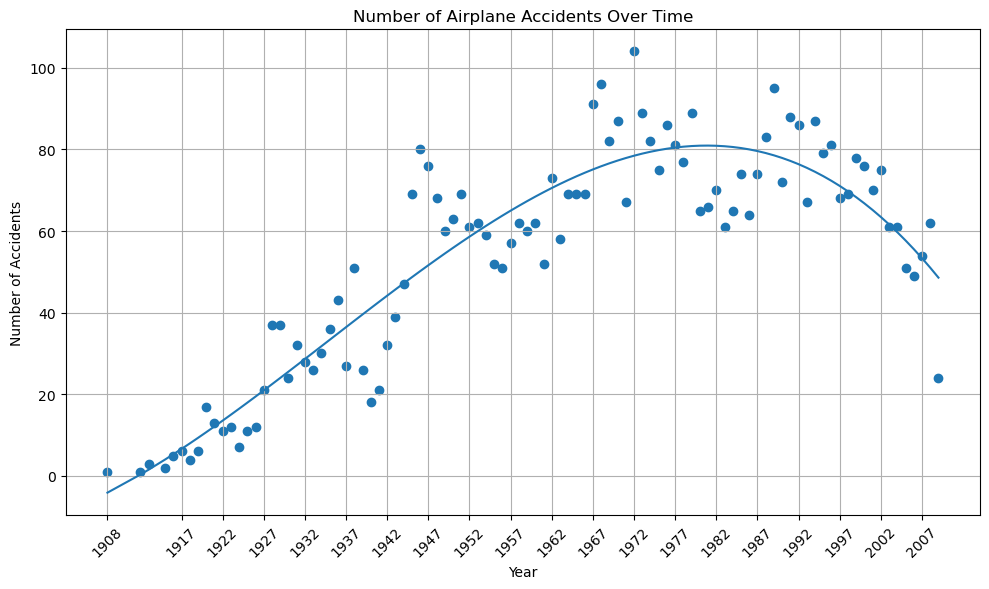

In [3]:
data.crashes_over_time_regression()

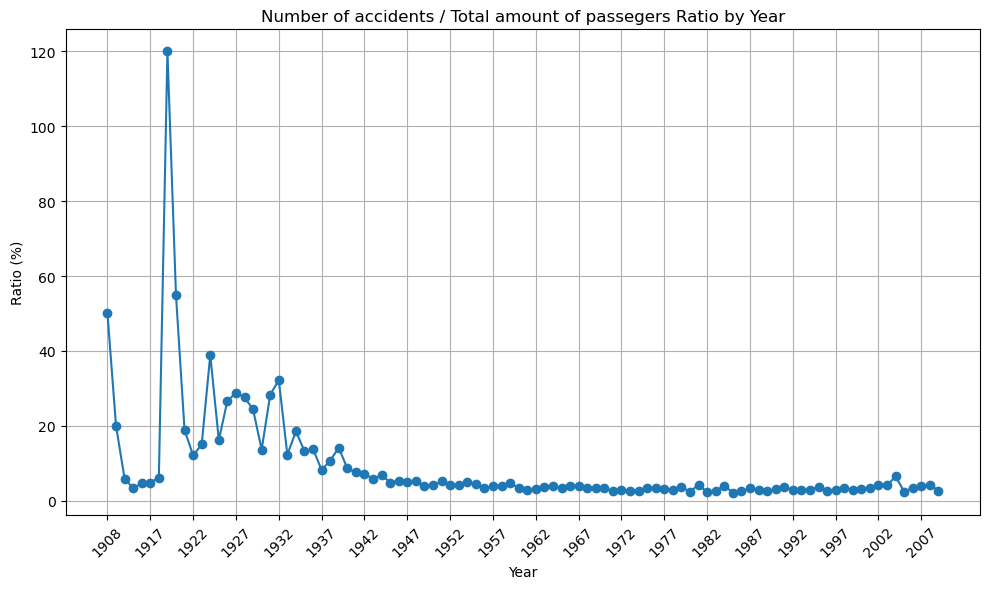

In [4]:
data.ratio_over_time()

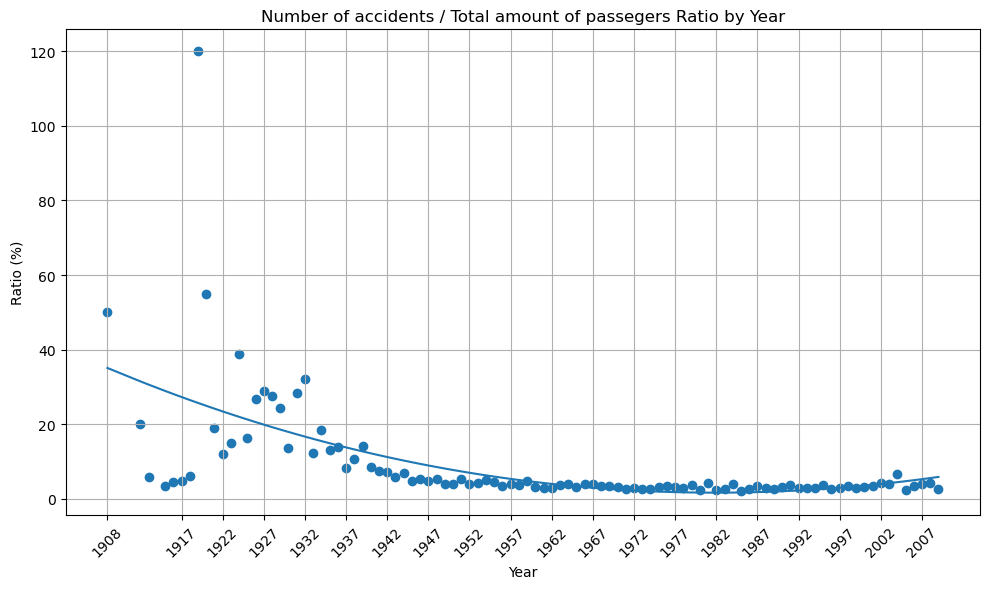

In [5]:
data.ratio_over_time_regression()

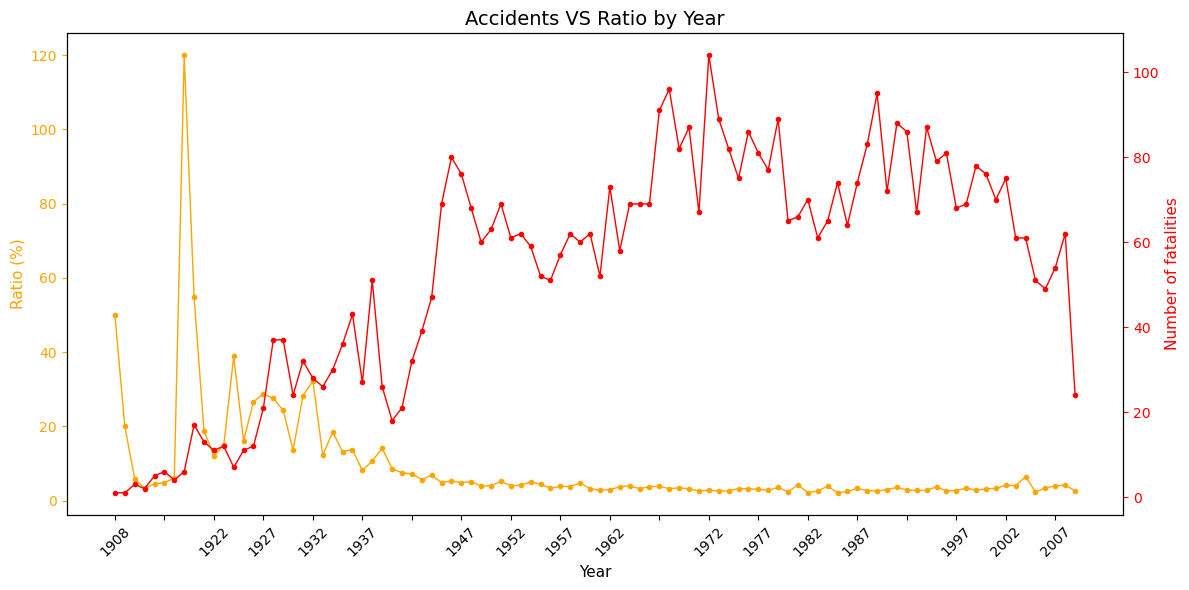

In [6]:
data.fatilities_vs_ratio()

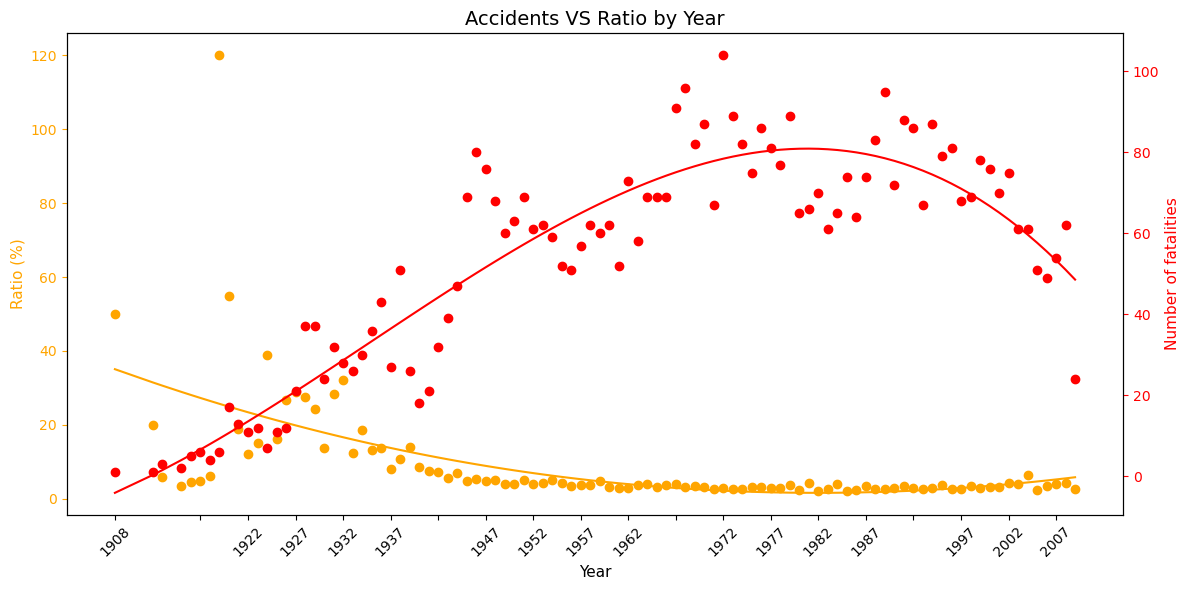

In [7]:
data.fatilities_vs_ratio_regression()

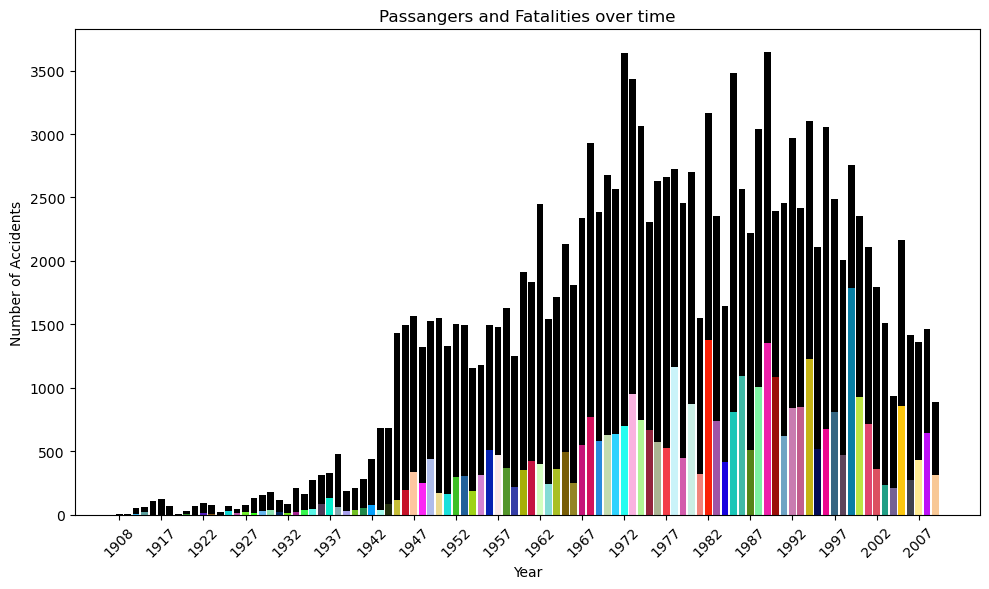

In [8]:
data.passanger_and_fatalities_over_time()

Douglas DC-3 : 334
de Havilland Canada DHC-6 Twin Otter 300 : 81
Douglas C-47A : 74
Douglas C-47 : 62
Douglas DC-4 : 40
Yakovlev YAK-40 : 37
Antonov AN-26 : 36
Junkers JU-52/3m : 32
Douglas C-47B : 29
De Havilland DH-4 : 28


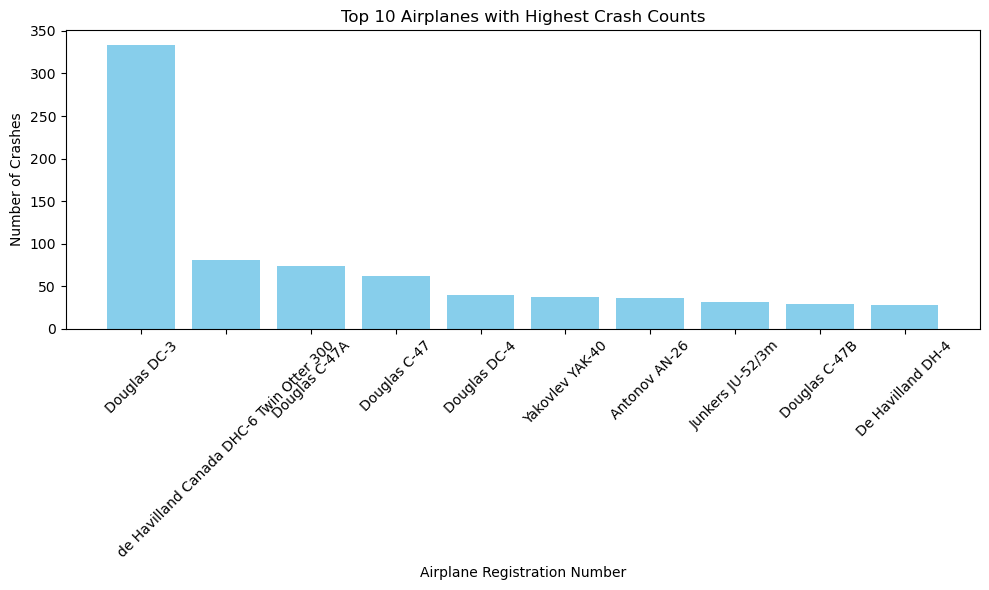

In [9]:
data.highest_crash_counts() #En čas edino prevozniško letalo. 

209


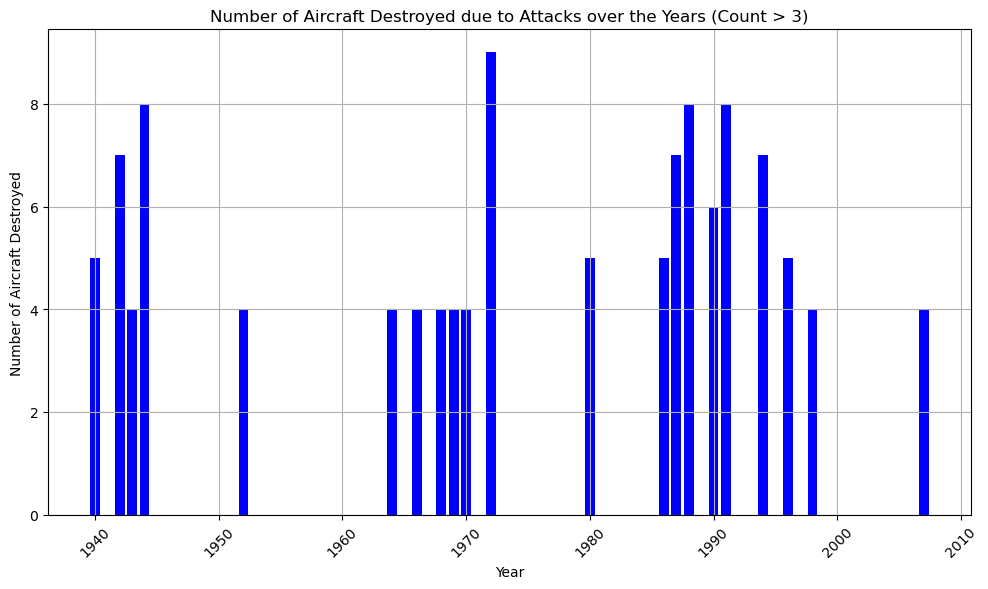

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def unicena_letala():
    unicena = data.extract_data_from_summary(["shoot", "shot", "attack"], ["overshoot", "undershoot"], "Summary")
    print(len(unicena))
    years, counts = np.unique([entry['Date'][-4:] for entry in unicena], return_counts=True)

    years_filtered = years[counts > 3]
    counts_filtered = counts[counts > 3]

    """for year,count in zip(years,counts):
        if(count>3):
            print(year,count)"""

    plt.figure(figsize=(10, 6))
    plt.bar(years_filtered.astype(int), counts_filtered, color='blue')
    plt.xlabel('Year')
    plt.ylabel('Number of Aircraft Destroyed')
    plt.title('Number of Aircraft Destroyed due to Attacks over the Years (Count > 3)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


unicena_letala() 
#Lahko izpišemo še kraj
#1940 - 2 svetovna vojna
#1960 - Vietnamska vojna
#1980 - Falklandska vojna
#1990 - Sovjetska zveza, Jugoslavija...

**Faulty design**

In [11]:
extracted = data.extract_data_from_summary(["faulty design", "design flaw", "design deficiencies"], [], "Summary")
print(len(extracted))


16


**Water**

In [12]:
extracted = data.extract_data_from_summary(["ocean", "water", "swamp", "sea", "river"], [], "Summary")
print(len(extracted))


617


**Low fuel**

In [13]:
extracted = data.extract_data_from_summary(["low fuel", "fuel exhaustion", "ran out of fuel", "running out of fuel"], [], "Summary")
print(len(extracted))


66


**Birds**

In [14]:
extracted = data.extract_data_from_summary(["bird", "geese", "flock"], [], "Summary")
print(len(extracted))

12


**Terrorism**

In [15]:
extracted = data.extract_data_from_summary(["terrorism", "terrorist"], [], "Summary")
print(len(extracted))

12


### Uspešnost letalskih podjetij glede na število mrtvih, število potnikov in število letov

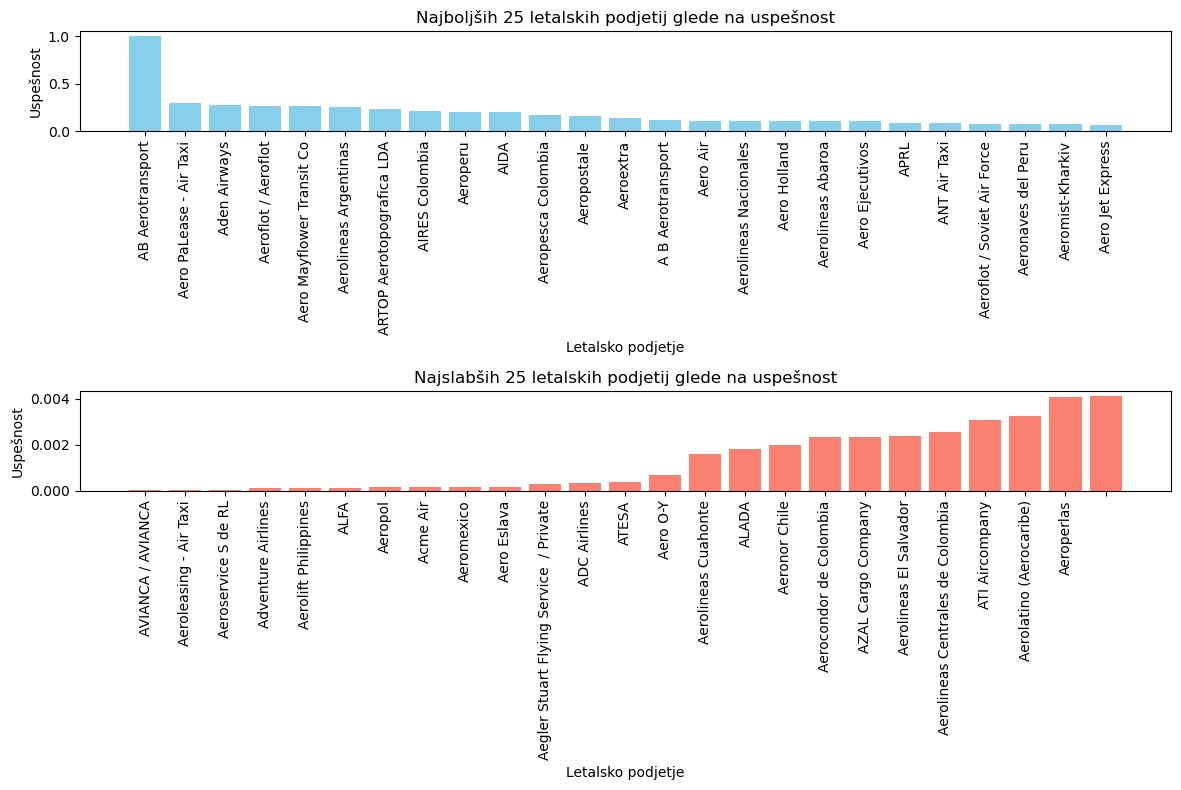

In [16]:
data.operator_performance() # Še enkrat v ChatGPT ali pa razmislimo

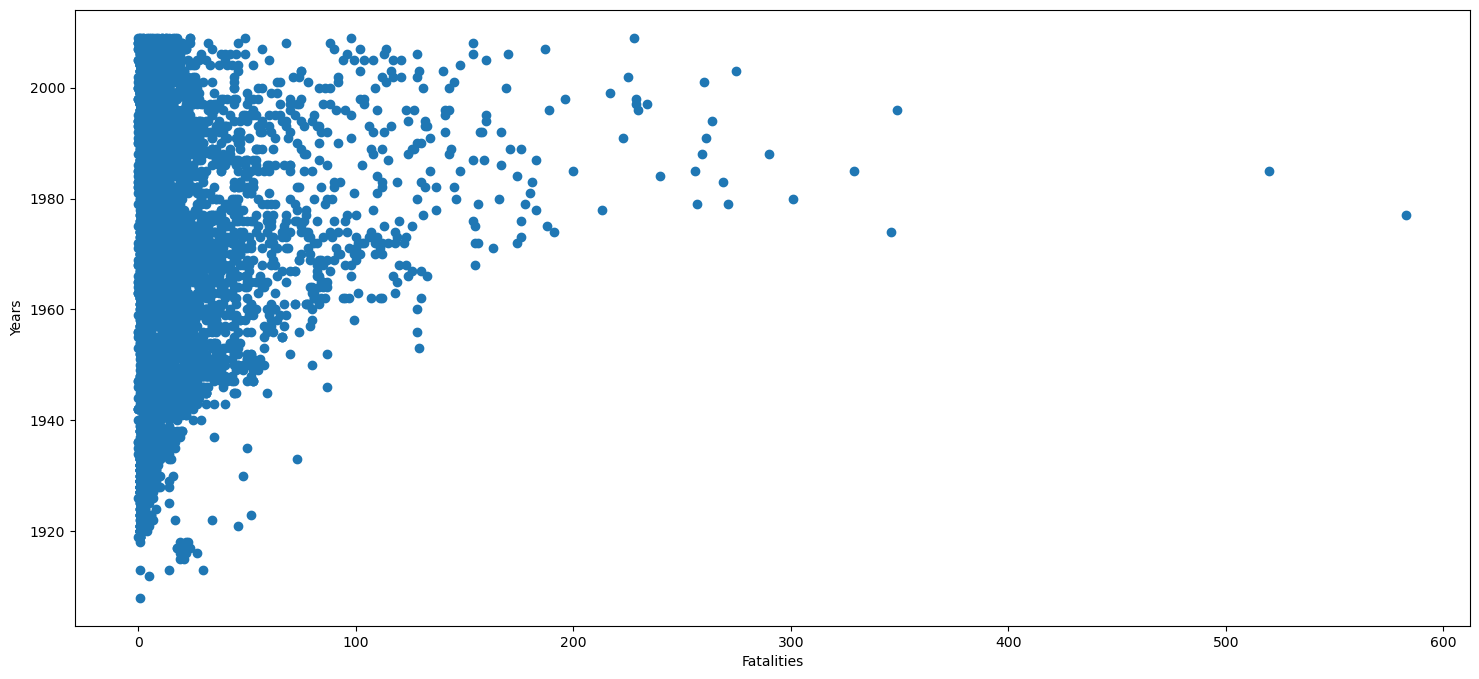

In [17]:
data.deaths_over_time()

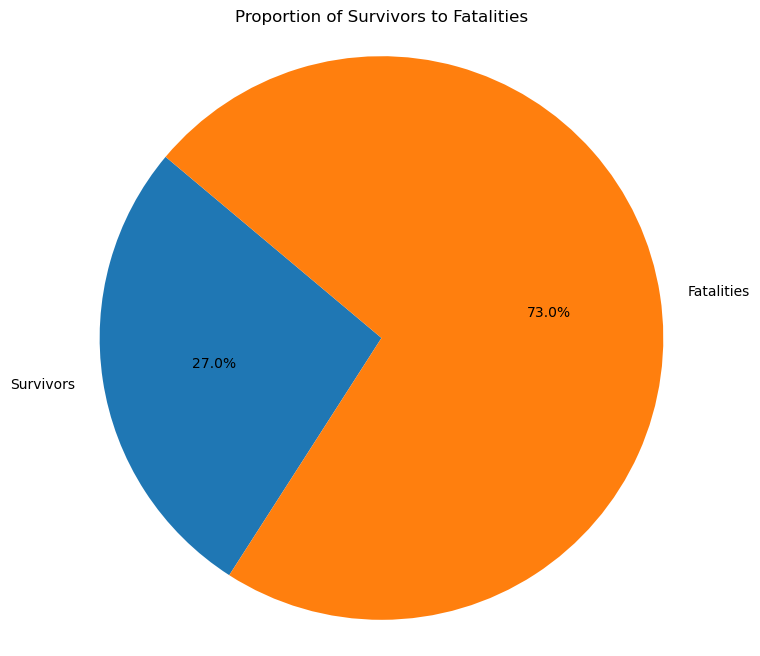

In [18]:
data.ratio_between_aboard_fatal()

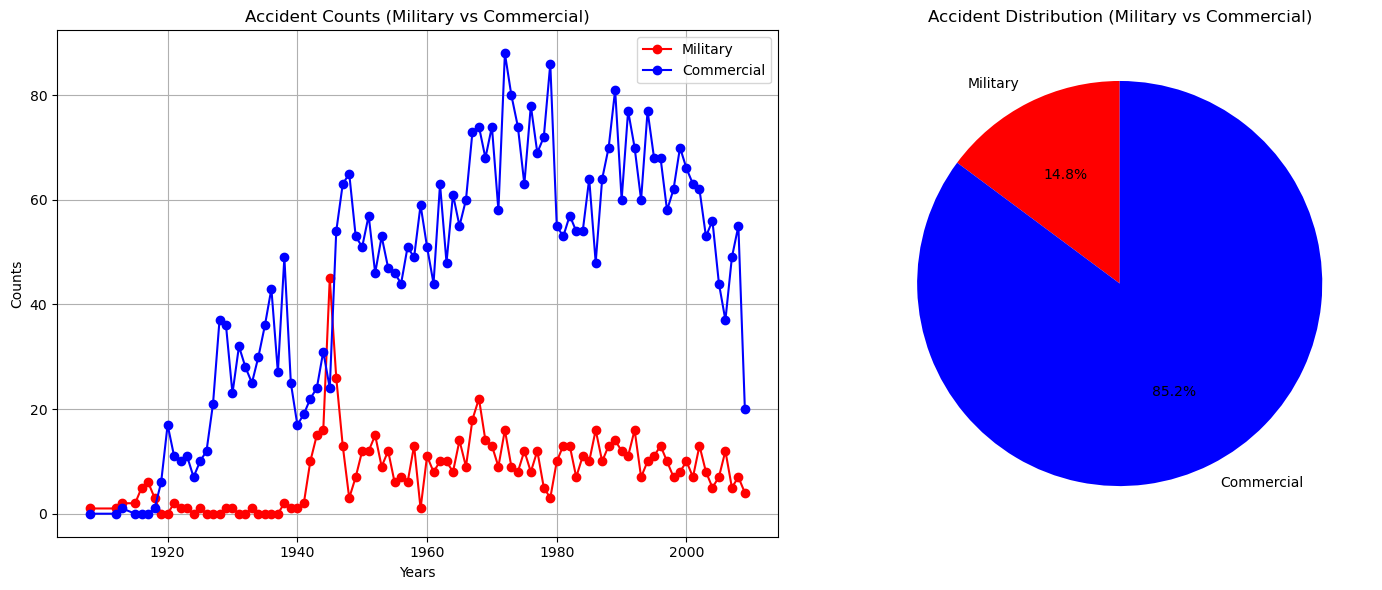

In [19]:
data.type_of_flights()

In [20]:
#data.crash_locations_on_map_2()
import ipywidgets as widgets
display(widgets.HTML(f'<img src="world_map.gif" width="750" align="center">'))

HTML(value='<img src="world_map.gif" width="750" align="center">')

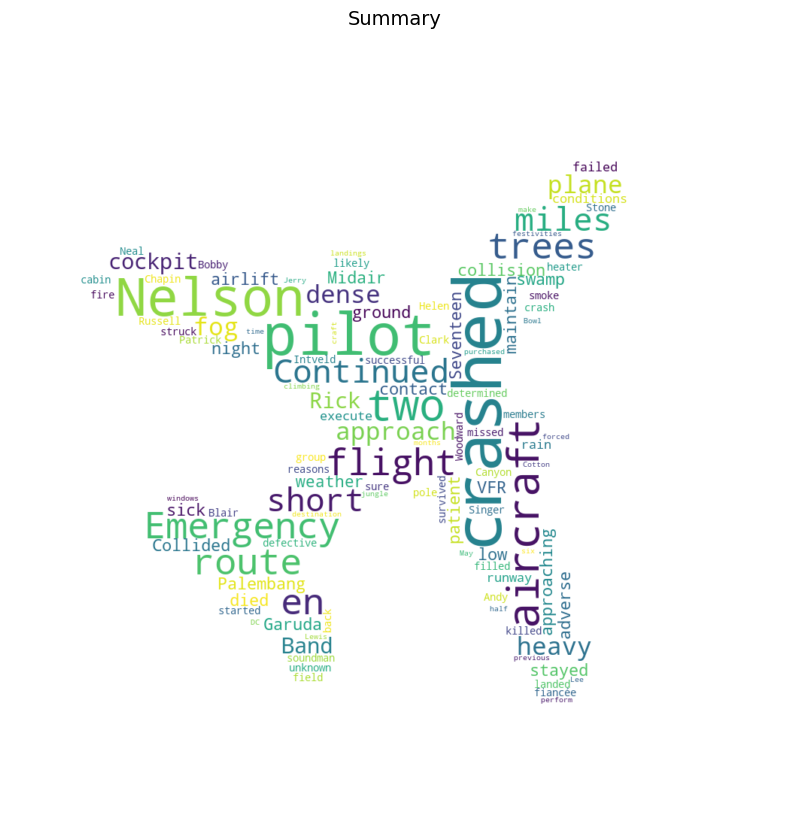

In [21]:
data.wordcloud('Summary')

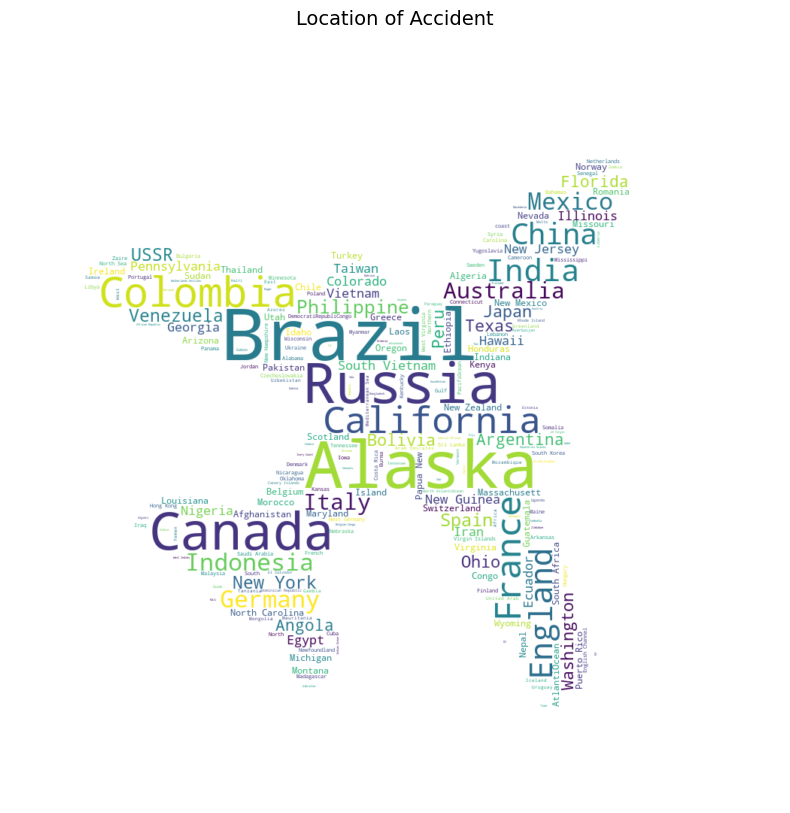

In [22]:
data.countrycloud('Location')

In [23]:
top_operators = data.top_operators('Operator', 3)
print("Operatorji z največ nesrečami:")
for operator, count in top_operators:
    print(f"{operator}: {count} nesreč")

Operatorji z največ nesrečami:
Aeroflot: 179 nesreč
Military - U.S. Air Force: 176 nesreč
Air France: 70 nesreč


Zanimivo je da je največ nesreč bilo pri Ruskemu operatorju in sicer Aeroflot. Pa raziscimo malo...

Narisimo graf, ki bo prikazoval st. nesrec operatorja Aeroflot vsako leto.

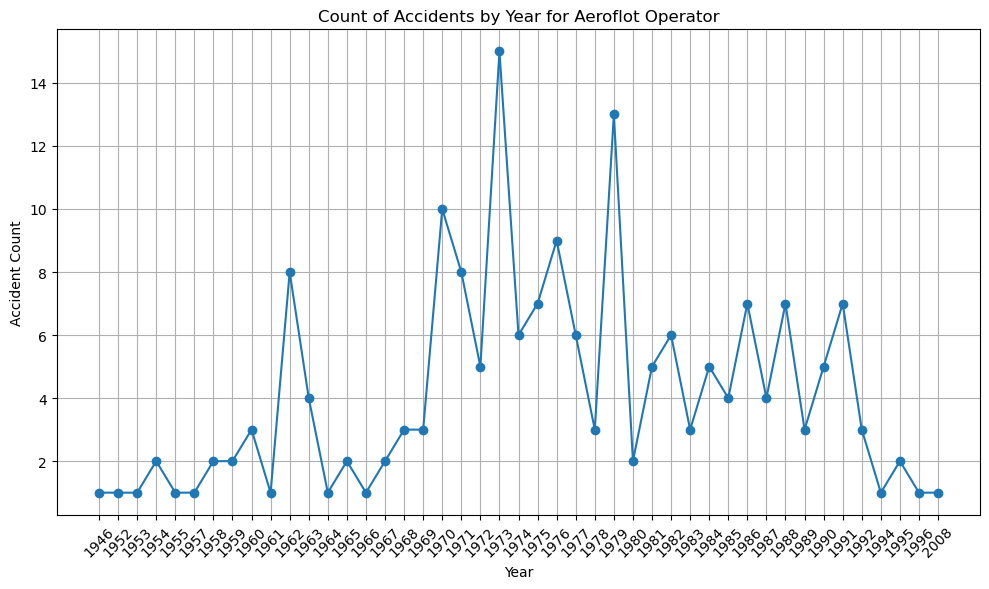

In [24]:
data.count_of_accidents_by_year_operator()

Opazimo da je prišlo do veliko nesreč med letom 1970 in 1990. Po krajšem brskanju na internetu imamo celo wikipedia članek na to temo.
https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s


Cluster 0:
The aircraft crashed 20 kilometres (12 mi) southeast of Toguchina, after it collided with a weather balloon while en route a domestic scheduled Novosibirsk–Krasnoyarsk passenger service as Flight 1661.
During the descent to Saratov the aircraft flew through cloud, during which ice built up on the airframe. The pilot attempted to increase engine power to correct the decrease in speed, but this failed. The aircraft lost control and entered a high rate of descent and crashed 13 km (8.1 mi) from the runway. The aircraft was operating a domestic scheduled Sverdlovsk–Ufa–Saratov passenger service as Flight 2174.
Collided with another An-2TP, tail number CCCP-40563, owing to air traffic controllers error. Landed safely, without any reported fatality on board. All occupants of CCCP-40563 perished in the accident.
Crashed while en route its first leg into a 750-metre-high (2,460 ft) mountain. The aircraft was operating an international scheduled Luanda–Malabo–Kinshasa–Tripoli–Moscow 

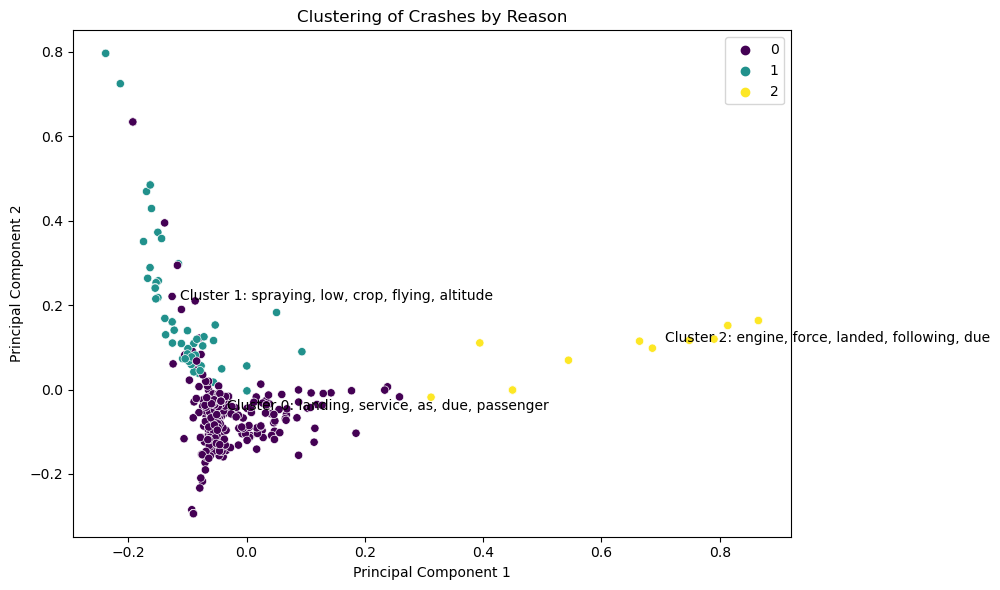

In [25]:
data.cluster_crashes_by_reason()

Cluster 1:
Midair collision between two Garuda aircraft. Both crashed into a swamp while approaching Palembang. Seventeen died on each aircraft.
Crashed 2 miles short of the runway during an approach in fog and heavy rain.
The aircraft broke-up at FL 370 and crashed in the desert. Detonation of an explosive device in the forward cargo compartment.
The aircraft hit Mt. Illimani at an altitude of 19,600 feet after being cleared to descend during an approach to La Paz. The crew did not follow the prescribed airway. Navigation error. Controlled flight into terrain.
The pilot declared an emergency and ditched into AtlantiOcean, 300 yards off Dania Beach in 15 feet of water. The pilot's inadequate planning for a Title 14 CFR Part 135 on-demand air taxi flight, and his failure to refuel the airplane, which resulted in fuel exhaustion while en route over the AtlantiOcean, a power off glide, and ditching in the ocean.

Cluster 2:
Emergency flight to airlift sick patient. Collided with trees whi

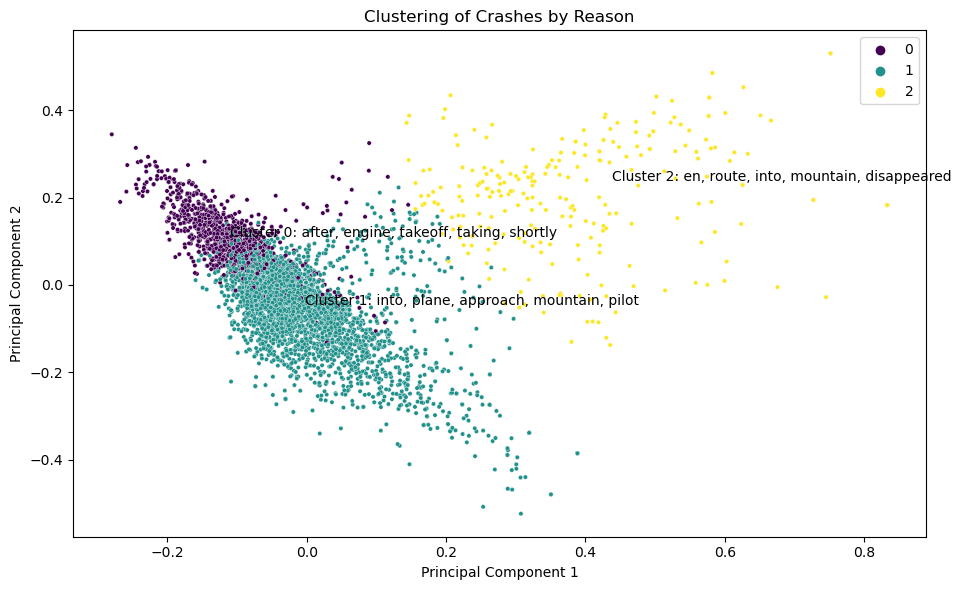

In [26]:
data.cluster_crashes_by_reason_vsi()